# Tutorial de Pandas

Pandas é a biblioteca do Python mais utilizada para trabalhar com conjuntos de dados de diferentes fontes de dados. \
Neste tutorial aprenderemos a como utilizá-la para extrair, transformar e carregar diversos tipos de dados.

Seu [código](https://github.com/pandas-dev/pandas) é aberto está hospedado no GitHub.  \
Sua [documentação](https://pandas.pydata.org/docs/), apesar de estar disponível somente em inglês, é bem completa e oferece tutoriais e exemplos.

In [1]:
%%html
<style>
table {float:left}
</style>

## Instalação

Caso você não tenha instalado o Pandas junto com os demais pacotes de Python (conforme explicado no [README.md](../README.md)), você pode instalá-lo usando o comando `pip`:

In [2]:
%pip install pandas  # NOTA: o símbolo de porcentagem no começo da linha permite você rodar comandos do terminal diretamente no notebook. 

Note: you may need to restart the kernel to use updated packages.


Para verificar se o Pandas foi instalado corretamente, tente importar ela e imprimir sua versão.

In [3]:
import pandas
pandas.__version__

'1.5.1'

Seguindo o padrão definido pelos desenvolvedores da biblioteca, utilizaremos as letras `pd` como pseudônimo para simplificar o nosso código. Assim, toda vez que quisermos utilizá-la não precisaremos escrever o nome dela completo (`pandas`), somente `pd`.

In [4]:
import pandas as pd
pd.__version__

'1.5.1'

## Introdução

>[Pandas](https://pandas.pydata.org/) é uma ferramenta de análise e manipulação de dados em código aberto rápida, poderosa, flexível e fácil de usar, 
construída sobre a linguagem de programação Python.


Essa biblioteca possui duas principais estruturas de dados: a coluna (_Series_) e a tabela (_DataFrame_).

## Series

### Series: declaração
Ao trabalhar com o Pandas, todas as colunas do seu conjunto de dados serão do tipo _Series_. Uma _Series_ também pode ser entendida como uma série ou sequência de dados. 
Você pode criar uma _Series_ na mão a partir de uma lista de Python. O exemplo abaixo mostra o número de mortes por Covid-19 a cada ano, de 2020 a 2023, de acordo com o 
[painel do Ministério da Saúde](https://infoms.saude.gov.br/extensions/covid-19_html/covid-19_html.html):

In [5]:
pd.Series([194950, 424110, 74800, 11320])

0    194950
1    424110
2     74800
3     11320
dtype: int64

No caso acima, declaramos de forma muito simples a nossa série de dados, mas mesmo assim o pandas adicionou os **índices** (0 a 3) e o **tipo de dados** (int64) da nossa coluna.
Algo interessante das _Series_ é que podemos criá-las definindo o seu nome, seus índices e qual será o seu tipo de dados:

In [6]:
covid_series = pd.Series([194950, 424110, 74800, 11320], 
    index=['Ano de 2020', 'Ano de 2021', 'Ano de 2022', 'Ano de 2023'], 
    name='obitos_por_covid', 
    dtype='int32'
)
covid_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     11320
Name: obitos_por_covid, dtype: int32

No exemplo acima, optamos por índices que são strings. Nós poderíamos ter adotado índices inteiros, por exemplo: `[2020, 2021, 2022, 2023]`. 

O código abaixo mostra como obter essas propriedades das _Series_:

In [7]:
print('Índices: ', covid_series.index)
print('Nome: ', covid_series.name)
print('Tipo: ', covid_series.dtype)

Índices:  Index(['Ano de 2020', 'Ano de 2021', 'Ano de 2022', 'Ano de 2023'], dtype='object')
Nome:  obitos_por_covid
Tipo:  int32


In [8]:
covid_series.to_dict()

{'Ano de 2020': 194950,
 'Ano de 2021': 424110,
 'Ano de 2022': 74800,
 'Ano de 2023': 11320}

Também podemos criar _Series_ através de dicionários, assim as chaves e os valores do dicionário serão, respectivamente, os índices e os valores da coluna:

In [9]:
dict_series = pd.Series({'Ano de 2020': 194950, 'Ano de 2021': 424110, 'Ano de 2022': 74800, 'Ano de 2023': 11320})
dict_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     11320
dtype: int64

In [10]:
# Dando um nome a uma Series já criada: 
dict_series.name = 'Mortes por covid'
dict_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     11320
Name: Mortes por covid, dtype: int64

### Series: acessando elementos

A forma mais simples de acessar um elemento de uma _Series_ é informando seu índice:

In [11]:
# Pega um elemento da série:
n_obitos = covid_series['Ano de 2021']

# Mostra o tipo do elemento: 
print(type(n_obitos))

# Mostra o valor do elemento:
n_obitos

<class 'numpy.int32'>


424110

Você pode selecionar vários elementos passando uma lista de índices para a _Series_. Nesse caso, a _Series_ retorna uma **slice** (fatia), isto é, um pedaço da _Series_ original: 

In [12]:
covid_series[['Ano de 2023', 'Ano de 2021']]

Ano de 2023     11320
Ano de 2021    424110
Name: obitos_por_covid, dtype: int32

### Series: Métodos

O grande poder das Series estão em seus mais de 300 métodos. Como não podemos explicar todos aqui, vamos focar nos mais importantes. Mas lembre-se: para qualquer coisa que você queira fazer com uma série (selecionar elementos, transformá-los, etc.) é muito provável que exista um método para isso. Pesquise na [documentação](https://pandas.pydata.org/docs/), no [Google](http://www.google.com), [Stack Overflow](https://stackoverflow.com/) ou pergunte ao [ChatGPT](https://chat.openai.com/).

Para exemplificar alguns métodos, vamos carregar dados sobre o desmatamento anual da floresta amazônica brasileira, 
obtidos por imagens de satélite do Instituto Nacional de Pesquisas Espaciais (INPE) aqui: <http://terrabrasilis.dpi.inpe.br/app/dashboard/deforestation/biomes/legal_amazon/rates>.

In [13]:
# Carrega Series com área desmatada na Amazônia, em quilômetros quadrados, em cada ano:
desmatamento = pd.read_csv('../90_dados/desmatamento_INPE/terrabrasilis_legal_amazon_16_12_2023.csv', index_col=0)['area_km2']

#### Series: Selecionando elementos

Podemos selecionar o começo e o final da série com os métodos `head` e `tail`:

In [14]:
desmatamento.head()

ano
1988    21050.0
1989    17770.0
1990    13730.0
1991    11030.0
1992    13786.0
Name: area_km2, dtype: float64

In [15]:
desmatamento.tail(7)

ano
2017     6947.0
2018     7536.0
2019    10129.0
2020    10851.0
2021    13038.0
2022    11594.0
2023     9001.0
Name: area_km2, dtype: float64

Podemos selecionar elementos a partir da sua posição na Series com o método `iloc`. Esse método funciona com a mesma lógica que a seleção de elementos de uma lista de Python.

In [16]:
desmatamento.iloc[5:8]

ano
1993    14896.0
1994    14896.0
1995    29059.0
Name: area_km2, dtype: float64

Também podemos selecionar elementos de uma Series a partir de seus índices. Para isso utilizamos o método `loc`. Vamos selecionar os anos anteriores ao lançamento do [Plano de Ação para Prevenção e Controle do Desmatamento na Amazônia Legal](https://www.gov.br/mma/pt-br/assuntos/prevencao-e-controle-do-desmatamento/amazonia-ppcdam-1) (PPCDAm), feito em 2004. Note que, quando utilizamos a seleção por índice (ou seja, o método `loc`), o final da seleção é incluído:

In [17]:
desmatamento.loc[1988:2003]

ano
1988    21050.0
1989    17770.0
1990    13730.0
1991    11030.0
1992    13786.0
1993    14896.0
1994    14896.0
1995    29059.0
1996    18161.0
1997    13227.0
1998    17383.0
1999    17259.0
2000    18226.0
2001    18165.0
2002    21650.0
2003    25396.0
Name: area_km2, dtype: float64

Vemos que, do início do programa PRODES do INPE (de coleta de dados sobre o desmatamento) até antes do PPCDAm, cerca de 13 mil $\mathrm{km^2}$ ou mais de floresta eram derrubados por ano, com grande variação de ano a ano. No ano de 2003, esse número chegou a mais de 25 mil $\mathrm{km^2}$.

Vamos selecionar os 7 primeiros anos do programa PPCDAm a partir de uma lista de índices:

In [18]:
desmatamento.loc[[2004, 2005, 2006, 2007, 2008, 2009, 2010]]

ano
2004    27772.0
2005    19014.0
2006    14286.0
2007    11651.0
2008    12911.0
2009     7464.0
2010     7000.0
Name: area_km2, dtype: float64

Vemos que, após a implementação do PPCDAm, houve uma queda grande no ritmo do desmatamento.

O método `loc` também funciona com uma lista booleana que informa se o elemento naquela posição deve ser selecionado. Nesse caso, o tamanho da lista precisa ser igual ao da Series:

In [19]:
# Lista que diz se cada elemento da Series `desmatamento` pertence ao 1o governo da Dilma Rouseff:
gov_dilma1 = [False, False, False, False, False, False, False, False, False, False, False, False, 
              False, False, False, False, False, False, False, False, False, False, False, True, 
              True, True, True, False, False, False, False, False, False, False, False, False]
assert len(gov_dilma1) == len(desmatamento)

In [20]:
desmatamento.loc[gov_dilma1]

ano
2011    6418.0
2012    4571.0
2013    5891.0
2014    5012.0
Name: area_km2, dtype: float64

A vantagem dessa estratégia é que podemos selecionar elementos da lista a partir de critérios. 
Por exemplo, vamos criar uma nova Series que diz se o desmatamento ficou abaixo de 10 mil $\mathrm{km^2}$ ou não:

In [21]:
menosde10 = desmatamento < 10000
menosde10

ano
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008    False
2009     True
2010     True
2011     True
2012     True
2013     True
2014     True
2015     True
2016     True
2017     True
2018     True
2019    False
2020    False
2021    False
2022    False
2023     True
Name: area_km2, dtype: bool

Agora podemos usar essa Series booleana para selecionar os elementos da Series `desmatamento`:

In [22]:
desmatamento[menosde10]

ano
2009    7464.0
2010    7000.0
2011    6418.0
2012    4571.0
2013    5891.0
2014    5012.0
2015    6207.0
2016    7893.0
2017    6947.0
2018    7536.0
2023    9001.0
Name: area_km2, dtype: float64

Outro exemplo que utiliza a mesma estratégia: vamos selecionar o segundo governo da Dilma Rouseff, até o golpe de 2016:

In [23]:
# Aqui combinamos duas condições com a operação lógica "E". Para isso usamos o símbolo "&":  
desmatamento.loc[(desmatamento.index >= 2015) & (desmatamento.index <= 2016)]

ano
2015    6207.0
2016    7893.0
Name: area_km2, dtype: float64

#### Series: medidas agregadas

Para uma Series, podemos calcular coisas como a média, valor máximo, valor mínimo, mediana, desvio padrão, entre outros. Vamos demonstrar algumas dessas coisas:

In [24]:
# Média de desmatamento antes do PPCDAm:
desmatamento.loc[:2003].mean()

17855.25

Vamos comparar com a média do desmatamento durante o PPCDAm (até antes de sua revogação, pelo governo federal, em 2019):

In [25]:
# Média do desmatamento durante o PPCDAm:
desmatamento.loc[2004:2018].mean()

10038.2

Também podemos ver qual foi o maior ritmo de desmatamento de 1988 a 2023:

In [26]:
desmatamento.max()

29059.0

E podemos achar o mínimo e o ano no qual ele ocorreu:

In [27]:
desmatamento.loc[desmatamento == desmatamento.min()]

ano
2012    4571.0
Name: area_km2, dtype: float64

#### Series: gráficos

In [28]:
# Para poder formatar melhor os gráficos:
import matplotlib.pyplot as pl

Fazer gráficos com os dados de uma Series é fácil:

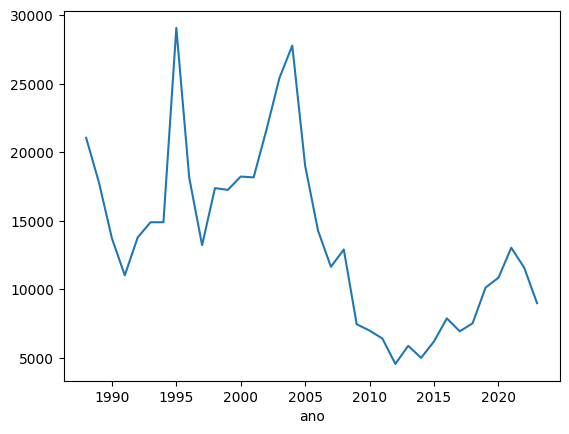

In [29]:
# Criando um gráfico a partir de uma Série. O eixo X contém os índices e o eixo Y contém os valores da Series:
desmatamento.plot();

Os gráficos podem ser formatados e anotados para melhorar o entendimento das pessoas:

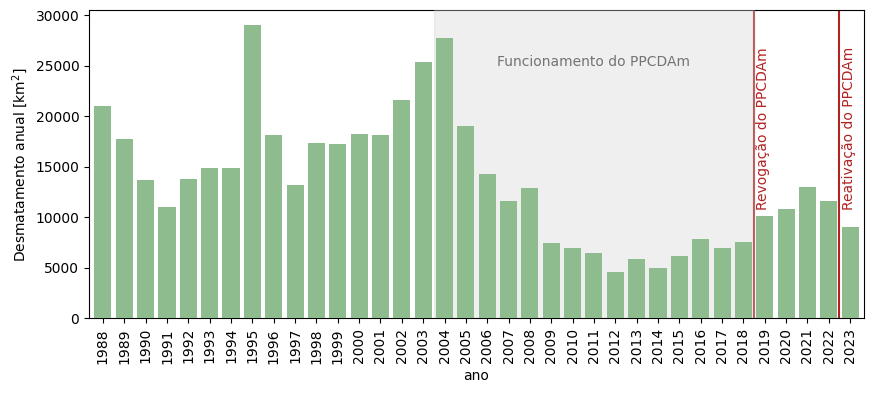

In [30]:
# Criando uma figura com o pyplot, para poder definir seu tamanho:
pl.figure(figsize=(10,4))

# Criando um gráfico de barra, com algumas formatações:
desmatamento.plot(kind='bar', width=0.8, color='darkseagreen', zorder=10);

# MAIS FORMATAÇÃO:

# Rótulo do eixo Y:
pl.ylabel('Desmatamento anual [$\mathrm{km^2}$]')

# Faixa cinza marcando período importante:
pl.axvspan(2003.5 - 1988, 2018.5 - 1988, color='0.8', alpha=0.3, zorder=5)

# Texto explicando a faixa cinza:
pl.text(2011 - 1988, 25000, 'Funcionamento do PPCDAm', ha='center', color='0.3')

# Linha vertical vermelha marcando momento importante:
pl.axvline(2018.5 - 1988, color='firebrick')
pl.text(2018.6 - 1988, 11000, 'Revogação do PPCDAm', color='firebrick', rotation=90, fontsize=10)
# Linha vertical vermelha marcando momento importante:
pl.axvline(2022.5 - 1988, color='firebrick')
pl.text(2022.6 - 1988, 11000, 'Reativação do PPCDAm', color='firebrick', rotation=90, fontsize=10)

pl.show()

#### Series: alterando elementos

Para alterar os valores de uma Series, basta selecionar os elementos que se deseja mudar e definir o novo valor. Por exemplo, vamos atualizar os óbitos de 2023 com dados mais recentes (de 18/12):

In [31]:
covid_series.loc['Ano de 2023'] = 14380
covid_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     14380
Name: obitos_por_covid, dtype: int32

Também é possível alterar vários elementos de uma vez. Para isso, você precisa selecionar esses elementos e atribuir um valor comum OU uma Series ou lista com o mesmo número de elementos.

In [32]:
# Vamos guardar uma cópia dos valores reais:
backup_covid = covid_series.copy()

In [33]:
# Vamos alterar os valores dos anos de 2020 e 2022:
covid_series.loc[[True, False, True, False]] = [10493, 20100]
covid_series

Ano de 2020     10493
Ano de 2021    424110
Ano de 2022     20100
Ano de 2023     14380
Name: obitos_por_covid, dtype: int64

In [34]:
# Vamos corrigir de volta os dados:
covid_series.loc[['Ano de 2020', 'Ano de 2022']] = backup_covid.iloc[[0, 2]]
covid_series

Ano de 2020    194950
Ano de 2021    424110
Ano de 2022     74800
Ano de 2023     14380
Name: obitos_por_covid, dtype: int64

## Dataframes

Um DataFrame é uma tabela de dados. Da mesma forma que uma tabela, um DataFrame tem linhas e colunas.

### Criando DataFrames

Além de carregar DataFrames a partir de arquivos externos (o que em geral vamos fazer), podemos criar DataFrames de várias outras formas. Vamos mostrar algumas delas abaixo:

In [35]:
# Criando um DataFrame a partir dos dados (na forma de uma matriz, ou lista de listas):
dados = [['a', 1, 10], ['b', 2, 20], ['c', 3, 30], ['d', 4, 40]]
exemplo1_df = pd.DataFrame(data=dados)
exemplo1_df

,0,1,2
0,a,1,10
1,b,2,20
2,c,3,30
3,d,4,40


No exemplo acima, os dados precisam ter uma estrutura de tabela. Isto é, todas as linhas precisam ter o mesmo número de elementos. 
No caso acima, usamos uma lista de listas, e cada lista interna vai virar uma linha do DataFrame. Portanto, as listas internas precisam ter todas o mesmo tamanho. 

In [36]:
# Também podemos especificar o nome das colunas e das linhas:
exemplo1_df = pd.DataFrame(data=dados, columns=['letra', 'unidade', 'dezena'], index=[1,2,3,4])
exemplo1_df

,letra,unidade,dezena
1,a,1,10
2,b,2,20
3,c,3,30
4,d,4,40


Outra forma de criar um DataFrame é a partir de um dicionário (`dict`). Nesse caso, cada elemento do dicionário vai virar uma coluna do DataFrame. 
Todas as colunas precisam ter o mesmo número de elementos:

In [37]:
# Criando um DataFrame a partir de um dicionário:
dicionario = {'letra': ['a', 'b', 'c', 'd'], 'unidade':[1, 2, 3, 4], 'dezena': [10, 20, 30, 40]}
exemplo2_df = pd.DataFrame(dicionario)
exemplo2_df

,letra,unidade,dezena
0,a,1,10
1,b,2,20
2,c,3,30
3,d,4,40


Quando utilizamos um dicionário para criar um DataFrame, as chaves (_keys_) do dicionário viram o nome das colunas.

### Estrutura de um DataFrame

Um DataFrame é composto por linhas e colunas. As linhas são identificadas pelos índices, e as colunas são identificadas pelos seus respectivos nomes. Podemos ver quais são os índices e os nomes das colunas assim:

In [38]:
# Pegando o índice de um DataFrame:
exemplo1_df.index

Int64Index([1, 2, 3, 4], dtype='int64')

In [39]:
# Pegando o nome das colunas:
exemplo1_df.columns

Index(['letra', 'unidade', 'dezena'], dtype='object')

Você pode pensar um DataFrame como uma coleção de Series, onde cada coluna é uma Series:

In [40]:
# Selecionando uma coluna. Ela aparece como uma Series:
exemplo1_df['dezena']

1    10
2    20
3    30
4    40
Name: dezena, dtype: int64

Você pode verificar várias propriedades do DataFrame:

In [41]:
# Como ver quantas linhas e colunas um DataFrame tem:
exemplo1_df.shape

(4, 3)

In [42]:
# O número de linhas também pode ser verificado com `len()`:
len(exemplo1_df)

4

In [43]:
# Verificando os tipos de variáveis em cada coluna:
exemplo1_df.dtypes
# (o tipo 'object pode ser qualquer coisa, e aparece quando o conteúdo da coluna são strings')

letra      object
unidade     int64
dezena      int64
dtype: object

### Selecionando elementos de um DataFrame

Para exemplificar o uso de DataFrames, vamos utilizar dados do Instituto de Pesquisa Econômica Aplicada (IPEA) sobre 
[remuneração líquida média mensal dos servidores no Poder Executivo civil federal ativo, por sexo e raça (1999-2020)](https://www.ipea.gov.br/atlasestado/consulta/145).

Em termos mais simples, esses dados mostram qual era o salário médio dos servidores públicos federais, ligados ao poder executivo, de 1999 a 2020, segmentados em 4 grupos sociais: mulheres negras, homens negros, mulheres brancas e homens brancos. É importante lembrar que, entre servidores públicos do poder executivo federal, existem muitos cargos diferentes (por exemplo, professor, motorista, técnico em informática, ministro, policial federal, fiscal da receita, presidente da república), e essas são as remunerações médias de cada segmento. Além disso: a remuneração é líquida (i.e. foram descontados impostos e contribuições); não inclui militares, pois estes não constam na base do Sistema Integrado de Administração de Recursos Humanos (SIAPE), utilizada no levantamento; e não inclui aposentados. Os valores apresentados são valores reais, isto é, corrigidos pelo índice de inflação IPCA para preços de fevereiro de 2020. Portanto, os valores representam o poder de compra médio de cada segmento. 

In [44]:
# Carrega dados de um arquivo CSV:
salario_df = pd.read_csv('../90_dados/servidores_federais/servidores-executivo-federal_remuneracao-liquida_1999-2020.csv')

# Visualizando o DataFrame. Se ele tiver muitas linhas, são mostradas apenas as primeiras e as últimas:
salario_df

,ano,sexo,raça,liquido
0,1999,Homem,Branca,6527.2
1,1999,Homem,Negra,4768.7
2,1999,Mulher,Branca,5261.6
3,1999,Mulher,Negra,4010.0
4,2000,Homem,Branca,5690.3
...,...,...,...,...
83,2019,Mulher,Negra,5996.2
84,2020,Homem,Branca,8774.2
85,2020,Homem,Negra,6272.2
86,2020,Mulher,Branca,7753.8


Como já vimos, as colunas de um DataFrame podem ser selecionadas da mesma forma que você faria com um dicionário:

In [45]:
# O resultado é uma Series:
salario_df['sexo']

0      Homem
1      Homem
2     Mulher
3     Mulher
4      Homem
       ...  
83    Mulher
84     Homem
85     Homem
86    Mulher
87    Mulher
Name: sexo, Length: 88, dtype: object

Também podemos selecionar mais de uma coluna passando uma lista de nomes. Nesse, resultado é um novo DataFrame:

In [46]:
# Selecionando várias colunas ao mesmo tempo retorna um novo DataFrame:
salario_df[['ano', 'raça']]

,ano,raça
0,1999,Branca
1,1999,Negra
2,1999,Branca
3,1999,Negra
4,2000,Branca
...,...,...
83,2019,Negra
84,2020,Branca
85,2020,Negra
86,2020,Branca


Os métodos que conhecemos para selecionar elementos de uma Series também podem ser utilizados em um DataFrame. Nesse caso, podemos passar dois argumentos dentro do `[]`. O primeiro é para selecionar as linhas. O segundo seleciona as colunas.

In [47]:
# Selecionando as linhas nas posições de 30 a 34 (lembrando que elas começam em zero):
salario_df.iloc[30:35]

,ano,sexo,raça,liquido
30,2006,Mulher,Branca,5269.9
31,2006,Mulher,Negra,3958.6
32,2007,Homem,Branca,7049.0
33,2007,Homem,Negra,4815.0
34,2007,Mulher,Branca,5822.3


Vamos selecionar as linhas que se referem a mulheres E a pessoas negras. Também vamos selecionar apenas as colunas `ano` e `liquido` (que contém a remuneração líquida média):

In [48]:
# Selecionando elementos do DataFrame através de uma lista booleana para as linhas e nome para as colunas:
criterio_linhas = (salario_df['sexo'] == 'Mulher') & (salario_df['raça'] == 'Negra')
salario_df.loc[criterio_linhas, ['ano', 'liquido']]

,ano,liquido
3,1999,4010.0
7,2000,3782.5
11,2001,3734.5
15,2002,4069.7
19,2003,3856.7
23,2004,3862.0
27,2005,4036.4
31,2006,3958.6
35,2007,4311.5
39,2008,4352.3


Os dados acima mostram que, de 1999 a 2020, o salário médio real das mulheres negras servidoras federais subiu quase 50%. Mas esse aumento aconteceu apenas em 2009 e 2010.  

Para selecionar as linhas, utilizamos uma lista (na verdade, uma Series) de valores booleanos. Mas poderíamos ter utilizado outras estratégias, como a seleção de colunas através de uma lista booleana, ou a seleção de linhas através de seus índices.

In [49]:
# Series booleana utilizada para selecionar as linhas:
criterio_linhas

0     False
1     False
2     False
3      True
4     False
      ...  
83     True
84    False
85    False
86    False
87     True
Length: 88, dtype: bool

Outra forma de selecionar elementos é com o método `query()`. Com ele você pode passar uma string com critérios para seleção de linhas. Por exemplo:

In [50]:
# Selecionamos os dados de 2020:
salario_2020_df = salario_df.query('ano == 2020')
salario_2020_df

,ano,sexo,raça,liquido
84,2020,Homem,Branca,8774.2
85,2020,Homem,Negra,6272.2
86,2020,Mulher,Branca,7753.8
87,2020,Mulher,Negra,5815.5


Vamos ordenar a tabela por remuneração média, do mais alto para o mais baixo. Isso pode ser feito com o método `sort_values()`:

In [51]:
# Ordena as linhas da tabela pelo valor da remuneração média líquida:
salario_2020_df.sort_values(by='liquido', ascending=False)

,ano,sexo,raça,liquido
84,2020,Homem,Branca,8774.2
86,2020,Mulher,Branca,7753.8
85,2020,Homem,Negra,6272.2
87,2020,Mulher,Negra,5815.5


Vemos que, enquanto o salário médio de homens brancos foi de 8.774 reais em 2020, o salário médio de mulheres negras foi de 5.815. Esse é uma das consequências do machismo e do racismo.

Outra forma útil de selecionar linhas é utilizando o método de Series chamado `isin()`. Esse método retorna uma série booleana que diz se cada elemento da 
Series original está entre um conjunto de valores possíveis:

In [52]:
# Cria uma Series booleana para selecionar certos anos:
anos_99_19 = salario_df['ano'].isin([1999, 2019])
anos_99_19

0      True
1      True
2      True
3      True
4     False
      ...  
83     True
84    False
85    False
86    False
87    False
Name: ano, Length: 88, dtype: bool

In [53]:
# Seleciona as linhas com base nisso:
salario_df.loc[anos_99_19]

,ano,sexo,raça,liquido
0,1999,Homem,Branca,6527.2
1,1999,Homem,Negra,4768.7
2,1999,Mulher,Branca,5261.6
3,1999,Mulher,Negra,4010.0
80,2019,Homem,Branca,9044.7
81,2019,Homem,Negra,6454.7
82,2019,Mulher,Branca,7977.5
83,2019,Mulher,Negra,5996.2


### Definindo o índice a partir de uma coluna

No código abaixo, criamos um loop sobre os segmentos sociais. Para cada um deles, criamos um gráfico. Um método novo que usamos aqui é o `set_index()`. 
Ele transforma uma coluna no índice do DataFrame. Isso é útil nesse caso pois, quando chamamos o método plot de uma Series, ele utiliza o índice como coordenada do eixo X.

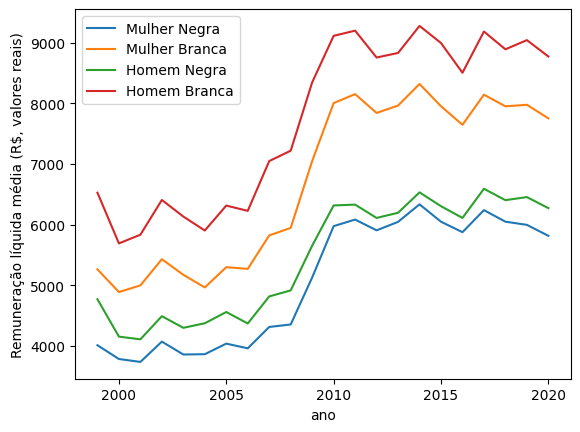

In [54]:
# Loop sobre os segmentos:
for sexo in ['Mulher', 'Homem']:
    for raca in ['Negra', 'Branca']:
        # Cria uma query (string para selecionar partes dos dados):
        q = f'sexo == "{sexo}" and raça == "{raca}"'
        # Seleciona um segmento:
        segmento_df = salario_df.query(q)
        segmento_df.set_index('ano')['liquido'].plot(label = f'{sexo} {raca}')

# Adiciona uma legenda ao gráfico:
pl.legend()
# Adiciona rótulo ao eixo Y:
pl.ylabel('Remuneração líquida média (R$, valores reais)')
pl.show()

O gráfico acima mostra que os salários de todos os segmentos permaneceram mais ou menos os mesmos de 1999 a 2006. 
Daí até 2011, houve um aumento de quase 50%. De 2011 em diante, os salários permaneceram novamente estáveis.

### Operando sobre as colunas do DataFrame

Para avançar no entendimento da evolução das remunerações dos servidores federais, vamos compará-las com uma remuneração de referência. Dessa forma, 
podemos ver se as diferenças aumentaram, diminuíram ou permaneceram constantes. Vamos escolher a remuneração mais alta como referência:

In [55]:
# Seleção de linhas, definição do ano como índice e seleção da série de remuneração:
remuneracao_ref = salario_df.query('sexo == "Homem" and raça == "Branca"').set_index('ano')['liquido']
# Redefinição do nome da Series:
remuneracao_ref.name = 'ref'

Vamos juntar essa informação ao nosso DataFrame utilizando o método `join()`. Esse método é usado para combinar duas ou mais tabelas (DataFrames) ou uma série e uma tabela com base em uma coluna específica.

O índice da tabela ou série a ser juntada precisa ser comum a alguma coluna da tabela que chama o método. Vamos chamar essa coluna de "chave". O método `join()` permite que você junte essas tabelas com base nessa coluna chave.Neste exemplo, tabela1 e tabela2 têm a coluna 'chave' em comum. Ao usar join, a tabela resultante, tabelas_combinadas, terá as colunas da tabela1 e da tabela2, onde as linhas são combinadas com base nos valores da coluna 'chave'. Se não houver uma correspondência para uma chave em uma das tabelas, os valores na tabela resultante serão preenchidos com NaN (Not a Number).

O parâmetro on='chave' especifica qual coluna é usada como chave para a junção. No exemplo acima, estamos usando a coluna 'chave' como base para combinar as tabelas.

Lembre-se de que existem diferentes tipos de junções (inner join, outer join, left join, right join), e você pode especificar o tipo usando o parâmetro how. O padrão é um inner join.


In [56]:
# Juntando uma série (ou outro DataFrame) a um DataFrame:
aprimorada_df = salario_df.join(remuneracao_ref, on='ano', how='left')
# Visualização:
aprimorada_df.head(10)

,ano,sexo,raça,liquido,ref
0,1999,Homem,Branca,6527.2,6527.2
1,1999,Homem,Negra,4768.7,6527.2
2,1999,Mulher,Branca,5261.6,6527.2
3,1999,Mulher,Negra,4010.0,6527.2
4,2000,Homem,Branca,5690.3,5690.3
5,2000,Homem,Negra,4151.7,5690.3
6,2000,Mulher,Branca,4887.3,5690.3
7,2000,Mulher,Negra,3782.5,5690.3
8,2001,Homem,Branca,5833.8,5833.8
9,2001,Homem,Negra,4107.2,5833.8


No caso acima, o DataFrame `salario_df` têm a coluna 'ano' em comum com o índice da Series `remuneracao_df`. Ao usar `join`, a tabela resultante terá as colunas de `salario_df` mais a nova série (ou as colunas da outra tabela), onde as linhas são combinadas com base nos valores da coluna 'ano': as linhas de `remuneracao_df` cujos índices forem iguais aos valores da coluna 'ano' em `salario_df` serão postas no na mesma linha. Se não houver uma correspondência para uma chave em uma das tabelas, os valores na tabela resultante serão preenchidos com `NaN` (_Not a Number_), que significa que o valor está faltando.

O parâmetro `on='ano'` especifica que a coluna 'ano' de `salario_df` é que será usada como chave para a junção. O parâmetro `how='left'` significa que, quando não houver correspondência, manteremos apenas as linhas da tabela da esquerda. Os valores sem correspondência da tabela ou série da direita serão descartados.

Agora, vamos executar operações entre duas colunas. Quando fazemos isso, a operação especificada 
é aplicada a cada par de elementos das Series, isto, é: linha por linha.

1. Vamos dividir os valores da coluna 'liquido' pelos valores da coluna 'ref'.
2. Vamos concatenas as string das colunas 'sexo' e 'raça', com um espaço no meio.

Os resultados podem ser colocados diretamente em uma nova coluna da tabela:

In [57]:
# Cálculo da fração entre a remuneração média do segmento e a remuneração de referência:
aprimorada_df['razao'] = aprimorada_df['liquido'] / aprimorada_df['ref']

# Cria nome completo do segmento:
aprimorada_df['segmento'] = aprimorada_df['sexo'] + ' ' + aprimorada_df['raça']

# Visualização:
aprimorada_df

,ano,sexo,raça,liquido,ref,razao,segmento
0,1999,Homem,Branca,6527.2,6527.2,1.000000,Homem Branca
1,1999,Homem,Negra,4768.7,6527.2,0.730589,Homem Negra
2,1999,Mulher,Branca,5261.6,6527.2,0.806104,Mulher Branca
3,1999,Mulher,Negra,4010.0,6527.2,0.614352,Mulher Negra
4,2000,Homem,Branca,5690.3,5690.3,1.000000,Homem Branca
...,...,...,...,...,...,...,...
83,2019,Mulher,Negra,5996.2,9044.7,0.662952,Mulher Negra
84,2020,Homem,Branca,8774.2,8774.2,1.000000,Homem Branca
85,2020,Homem,Negra,6272.2,8774.2,0.714846,Homem Negra
86,2020,Mulher,Branca,7753.8,8774.2,0.883704,Mulher Branca


### Reorganizando os dados em outras formas

Para visualizar em um gráfico a evolução da razão entre as remunerações, vamos _pivotar_ a tabela. 
Isso significa que vamos criar uma nova tabela na qual os valores que aparecem em uma coluna serão separados em colunas diferentes.
Para isso, vamos selecionar uma das colunas de `aprimorada_df` para especificar os índices, outra para especificar as colunas e 
outra para especificar os valores. No exemplo abaixo, a coluna 'ano' será o índice, a 'segmento' será a coluna e a 'razao' será os valores.

Os valores são o que aparecerá na tabela. Para saber em qual linha e coluna ele vai aparecer, vemos qual o valor de 'ano' e 'segmento' que aparecem na mesma linha de `aprimorada_df`. Desse jeito, temos a evolução da remuneração de cada segmento em uma coluna diferente:

In [58]:
# Reorganiza a série temporal de remuneração de cada segmento em uma coluna separada:
segmento_por_coluna_df = aprimorada_df.pivot(index='ano', columns='segmento', values='razao')
segmento_por_coluna_df

segmento,Homem Branca,Homem Negra,Mulher Branca,Mulher Negra
ano,,,,
1999,1.0,0.730589,0.806104,0.614352
2000,1.0,0.729610,0.858883,0.664728
2001,1.0,0.704035,0.856646,0.640149
2002,1.0,0.700734,0.847464,0.635196
2003,1.0,0.700667,0.843249,0.628813
2004,1.0,0.740687,0.840892,0.654255
2005,1.0,0.721842,0.839066,0.639237
2006,1.0,0.701572,0.846258,0.635685
2007,1.0,0.683076,0.825975,0.611647


Agora é fácil criar um gráfico com as séries de todos os segmentos. Quando chamamos o método `plot()` em um DataFrame,
todas as colunas são colocadas no gráfico, cada uma com seu nome, enquanto o índice serve de valores do eixo X.

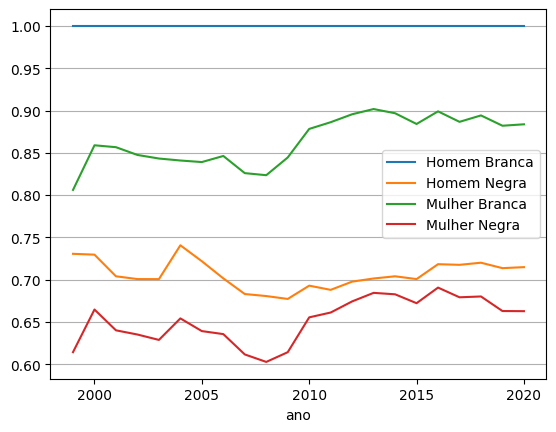

In [59]:
# Criação de gráfico para cada coluna do DataFrame:
segmento_por_coluna_df.plot()
pl.legend()

# Adiciona linhas horizontais de referência:
pl.grid(axis='y')
pl.show()

O gráfico mostra que a remuneração média da servidora branca era próxima de 85% da remuneração média do servidor branco até 2009. Depois disso, ela sobe para quase 90%. A remuneração média das servidoras negras também se aproximou da remuneração dos servidores brancos, passando de cerca de 63% para 68%, aproximadamente. A remuneração média delas também se aproximou da dos homens negros. Dessa forma, a desigualdade entre homens e mulheres diminuiu no período. Entretanto, a desigualdade racial permaneceu estável, com homens negros ganhando, em média, 70% da remuneração dos homens brancos.